In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing

In [28]:
(train_x , train_y) , (test_x , test_y) = boston_housing.load_data()

In [29]:
print("Train_x shape:- ",train_x.shape)
print("Test_x shape:- ",test_x.shape)
print("Train_y shape:- ",train_y.shape)
print("Test_y shape:- ",test_y.shape)

Train_x shape:-  (404, 13)
Test_x shape:-  (102, 13)
Train_y shape:-  (404,)
Test_y shape:-  (102,)


In [30]:
train_x[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [31]:
test_x[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [32]:
train_x = preprocessing.normalize(train_x)
test_x = preprocessing.normalize(test_x)

## ANN Model Building part

In [33]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [34]:
train_x[0].shape[0]

13

In [35]:
model = Sequential()
# Adding the input layer and the first hidden layer
#Units means no of neurons and input_dim take the no of features as input
model.add(Dense( units= 128,activation='relu',input_dim = train_x[0].shape[0]))# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))

model.add(Dense(units = 32, activation = 'relu'))
# Adding the output layer here units value is 1 because we want just 1 output
model.add(Dense(1))


In [36]:
# Compiling the ANN
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [37]:
model_history = model.fit(x = train_x , y = train_y , epochs = 100 , batch_size = 1 , verbose=1)

Epoch 1/100
404/404 [==============================] - 3s 2ms/step - loss: 312.8600 - mae: 13.7472
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 71.3062 - mae: 5.8795
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 79.6396 - mae: 6.3995
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 69.2251 - mae: 5.5131
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 55.3568 - mae: 5.0867
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 61.2228 - mae: 5.4091
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 58.6810 - mae: 5.3126
Epoch 8/100
404/404 [==============================] - 1s 2ms/step - loss: 60.1012 - mae: 5.2021
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 55.7586 - mae: 5.0862
Epoch 10/100
404/404 [==============================] - 1s 2ms/step - loss: 61.0907 - mae: 5.4095
Epoch 11/100
404/404 [=====

404/404 [==============================] - 1s 2ms/step - loss: 19.1082 - mae: 3.0946
Epoch 85/100
404/404 [==============================] - 1s 2ms/step - loss: 22.1660 - mae: 3.0564
Epoch 86/100
404/404 [==============================] - 1s 2ms/step - loss: 16.1587 - mae: 2.8062
Epoch 87/100
404/404 [==============================] - 1s 2ms/step - loss: 18.9503 - mae: 2.9846
Epoch 88/100
404/404 [==============================] - 1s 2ms/step - loss: 18.3931 - mae: 3.1401
Epoch 89/100
404/404 [==============================] - 1s 2ms/step - loss: 16.0662 - mae: 2.9756
Epoch 90/100
404/404 [==============================] - 1s 2ms/step - loss: 15.0757 - mae: 2.8454
Epoch 91/100
404/404 [==============================] - 1s 2ms/step - loss: 18.8402 - mae: 3.0501
Epoch 92/100
404/404 [==============================] - 1s 1ms/step - loss: 20.2044 - mae: 3.0326
Epoch 93/100
404/404 [==============================] - 1s 1ms/step - loss: 17.1606 - mae: 3.1039
Epoch 94/100
404/404 [===========

In [38]:
test_x[0]

array([0.02675675, 0.        , 0.02677953, 0.        , 0.0010046 ,
       0.00951931, 0.14795322, 0.0027145 , 0.03550877, 0.98536841,
       0.02988655, 0.04031725, 0.04298041])

In [39]:
test_y[0]

7.2

In [40]:
test_input = [[0.02675675, 0., 0.02677953, 0. , 0.0010046 ,0.00951931, 0.14795322, 0.0027145 , 0.03550877, 0.98536841,0.02988655, 0.04031725, 0.04298041]]
print("Actual Output:- 7.2")
print("Predicted Output:- ",model.predict(test_input)[0][0])

Actual Output:- 7.2
Predicted Output:-  9.983112


In [42]:
print(model_history.history.keys())

dict_keys(['loss', 'mae'])


dict_keys(['loss', 'mae'])


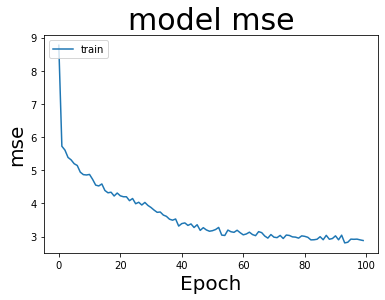

In [46]:
# list all data in history

print(model_history.history.keys())
# summarize history for mse
plt.plot(model_history.history['mae'])
#plt.plot(np.array())
plt.title('model mse',fontsize=30)
plt.ylabel('mse',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(['train'], loc='upper left')
plt.show()

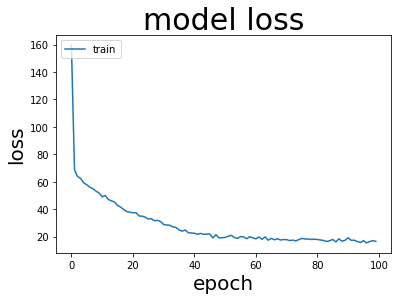

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train'], loc='upper left')
plt.show()
